In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score 

In [38]:
Train=pd.read_csv("/content/trainKNN.txt",header=None,names=["id","RI","Na","Mg","AI","Si","K","Ca","Ba","Fe","Type of Glass"])
Train.head()

,id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [39]:
Test=pd.read_csv("/content/testKNN.txt",header=None,names=["id","RI","Na","Mg","AI","Si","K","Ca","Ba","Fe","Type of Glass"])
Test.head()

,id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type of Glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [40]:
print(Train.shape)
print(Test.shape)

(196, 11)
(18, 11)


In [41]:
Train.isnull().sum()

id               0
RI               0
Na               0
Mg               0
AI               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [42]:
Test.isnull().sum()

id               0
RI               0
Na               0
Mg               0
AI               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

# EDA

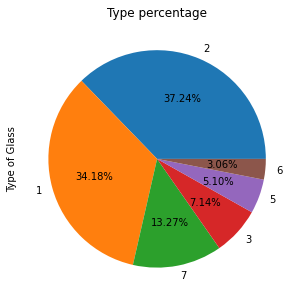

In [43]:
plt.figure(1, figsize=(5,5))
plt.title("Type percentage")
Train['Type of Glass'].value_counts().plot.pie(autopct="%0.2f%%")

# **Train dataset euclidean and manhattan.**

In [44]:
x_train = Train.drop(["Type of Glass"], axis=1)
y_train = Train["Type of Glass"]

In [45]:
from sklearn.preprocessing import StandardScaler #scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [46]:
for i in [1,2,3,4,5,6,7,8,9,10]:
  knn = KNeighborsClassifier(i) 
  knn.fit(x_train,y_train) 
  print("K value  : " , i,"train_score;",knn.score(x_train,y_train), " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



K value  :  1 train_score; 1.0  score :  0.8363157894736842
K value  :  2 train_score; 0.9132653061224489  score :  0.8381578947368421
K value  :  3 train_score; 0.9489795918367347  score :  0.8728947368421052
K value  :  4 train_score; 0.9030612244897959  score :  0.8476315789473684
K value  :  5 train_score; 0.923469387755102  score :  0.8878947368421052


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



K value  :  6 train_score; 0.9081632653061225  score :  0.8428947368421053
K value  :  7 train_score; 0.9030612244897959  score :  0.8576315789473684
K value  :  8 train_score; 0.9081632653061225  score :  0.8071052631578948
K value  :  9 train_score; 0.8928571428571429  score :  0.8121052631578948
K value  :  10 train_score; 0.8622448979591837  score :  0.8021052631578949


In [47]:
euclid_model = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
euclid_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [48]:
manhattan_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
manhattan_model.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [49]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_train,manhattan_model.predict(x_train))
accu

0.9489795918367347

In [50]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_train,euclid_model.predict(x_train))
accu

0.923469387755102

# **Test dataset euclidean and manhattan.**

In [51]:
x_test = Test.drop(["Type of Glass"], axis=1)
y_test = Test["Type of Glass"]

In [52]:
from sklearn.preprocessing import StandardScaler #scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [53]:
euclid_model = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
euclid_model.fit(x_test,y_test)

KNeighborsClassifier(metric='euclidean')

In [54]:
manhattan_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
manhattan_model.fit(x_test, y_test)

KNeighborsClassifier(metric='manhattan')

In [55]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test,manhattan_model.predict(x_test))
accu

1.0

In [56]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test,euclid_model.predict(x_test))
accu

1.0